# Circuits to prepare bell states

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Statevector

In [2]:
def Phi_plus(qreg, creg):
    circuit = QuantumCircuit(qreg, creg)
    circuit.h(0)
    circuit.cx(0, 1)
    circuit.measure(qreg, creg)
    return circuit

In [3]:
qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')

In [4]:
qc = Phi_plus(qreg, creg)

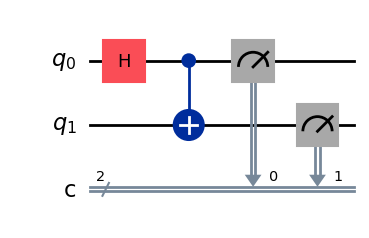

In [5]:
qc.draw('mpl')

In [10]:
pub = [(qc, [])]

In [11]:
sampler = StatevectorSampler()

In [23]:
job = sampler.run(pub, shots = 1000)

In [28]:
job.result()[0].data.c.get_bitstrings()

['11',
 '11',
 '11',
 '11',
 '11',
 '00',
 '00',
 '11',
 '11',
 '00',
 '00',
 '11',
 '00',
 '11',
 '00',
 '00',
 '00',
 '11',
 '00',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '00',
 '11',
 '11',
 '00',
 '11',
 '11',
 '00',
 '00',
 '11',
 '11',
 '00',
 '00',
 '11',
 '11',
 '00',
 '11',
 '00',
 '00',
 '11',
 '00',
 '11',
 '00',
 '11',
 '00',
 '00',
 '00',
 '11',
 '11',
 '00',
 '11',
 '00',
 '00',
 '00',
 '11',
 '00',
 '00',
 '11',
 '11',
 '11',
 '11',
 '00',
 '00',
 '11',
 '11',
 '11',
 '00',
 '11',
 '00',
 '00',
 '00',
 '11',
 '11',
 '11',
 '11',
 '00',
 '11',
 '00',
 '00',
 '11',
 '11',
 '00',
 '00',
 '00',
 '00',
 '11',
 '11',
 '00',
 '00',
 '00',
 '11',
 '11',
 '00',
 '00',
 '11',
 '11',
 '11',
 '11',
 '11',
 '00',
 '00',
 '00',
 '00',
 '11',
 '00',
 '00',
 '11',
 '00',
 '11',
 '00',
 '11',
 '00',
 '11',
 '11',
 '00',
 '11',
 '11',
 '11',
 '00',
 '11',
 '00',
 '00',
 '00',
 '11',
 '00',
 '00',
 '11',
 '11',
 '11',
 '11',
 '11',
 '00',
 '11',
 '11',
 '00',
 '11',
 '11',
 '11',
 '11',

# Statevector sampler example with two-site Ising

In [143]:
qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')

In [144]:
from qiskit.circuit import Parameter

In [218]:
qc = QuantumCircuit(qreg, creg)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.rz(2 * Parameter('theta'), 1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
qc.measure(qreg, creg)

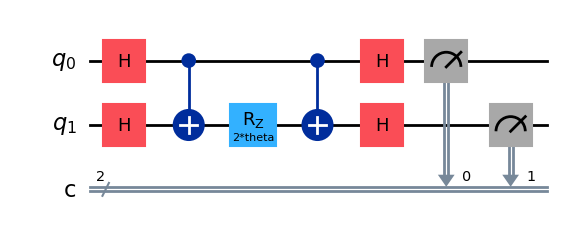

In [219]:
qc.draw('mpl')

In [220]:
import numpy as np

In [221]:
phi_vals = np.linspace(0, 10, 100)

In [222]:
sampler = StatevectorSampler()

In [223]:
job = sampler.run([(qc, phi_vals)], shots = 1000)

In [224]:
results = job.result()[0]

In [225]:
data_vals = []

In [226]:
for num in range(len(phi_vals)):
    results.data.c.get_counts()

In [227]:
num_phis = len(phi_vals)
lst1 = []
lst2 = []
for num in range(num_phis):
    result_data = results.data.c.get_counts(num)
    lst1.append(result_data.get('00', 0))
    lst2.append(result_data.get('11', 0))

In [230]:
y_array = np.array(lst1)/1000

In [233]:
y_exact = np.cos(phi_vals) ** 2

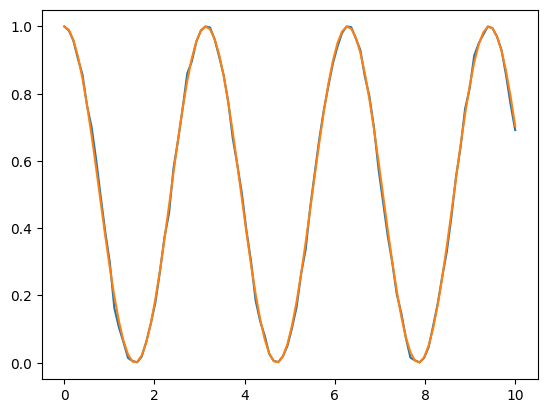

In [234]:
plt.plot(phi_vals, y_array)
plt.plot(phi_vals, y_exact)

In [235]:
from matplotlib import pyplot as plt

In [189]:
results.data.c.get_counts(0).get('11')

In [190]:
lst = []

In [193]:
lst.append(results.data.c.get_counts(0).get('11'))